## fit()
모델을 학습한다. 모델이 손실함수(오차)로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련 또는 적합(fitting)이라고 하는데, 이는 모델이 데이터에게 적합(fit)해가는 과정이기 때문이다. 그런 의미에서 fit()은 모델이 훈련을 시작한다는 함수이다.
```python
[ 기본 ]
model.fit(X_train, y_train, epochs=10, batch_size=32)

첫번째 인자 = 훈련 데이터
두번째 인자 = (지도 학습에서) 레이블 데이터
epochs = 1에폭은 전체 데이터를 한차례 훑고 지나감을 의미한다. 정수값으로 기재해야하며 총 훈련 횟수를 정의
batch_size = 배치 크기. 기본값은 32. 미니배치 경사 하강법을 사용하고 싶지 않을 경우에는 None을 기재한다.



[ 조금 더 많은 인자 사용 ]
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))
혹은
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))


validation_data(x_val, y_val) = 검증 데이터사용. 일반적으로 검증 데이터를 사용하면 각 에폭마다 검증 데이터의 정확도나 오차를 함께 출력하는데, 이 정확도는 훈련이 잘 되고 있는지를 보여줄 뿐이며 실제로 모델이 검증데이터를 학습하지는 않는다. val data의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합의 신호이다.
validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 대신 사용할 수 있다. 검증 데이터를 지정하는 것이 아니라 훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용하는 것
verbose = 학습 중 출력되는 문구를 설정합니다.
          - 0 : 아무 것도 출력하지 않습니다.
          - 1 : 훈련의 진행도를 보여주는 진행 막대
          - 2 : 미니 배치마다 손실 정보를 출력
```




## Sequential model
Sequential() 이란 입력층, 은닉층, 출력층을 구성하기 위해 사용되는 것이다. Sequential()으로 모델을 선언한 뒤 단계적으로 층을 추가할 수 있다.

In [89]:
# Sequential Class
import keras
from keras import Sequential
from keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

Sequential 모델은 시작하기에 가장 쉬운 Api이다. 기본적으로 하나의 파이썬 리스트이며 단순히 층을 쌓아 만들 수 있다. 만들기에 가장 간단한 방법은 Sequential 클래스를 사용하는 것인데 add() 메서드를 사용하여 점진적으로 만들어줄 수도 있다. 이 메서드는 파이썬 리스트의 append() 메서드와 비슷하다
```python
model = keras.Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax))
```
층은 처음 호출될 때 만들어진다. 층의 가중치 크기가 입력 크기에 따라 달라지니 입력 크기를 알기 전까지 가중치를 만들 수 없기 때문이다.
<br>
따라서 위 모델은 어떠한 가중치를 가지고 있지 않다. 가중치를 생성하려면 어떤 데이터로 호출하거나 입력크기를 지정하여 build() 메서드를 호출해야한다.

In [90]:
# 입력 크기의 None은 어떤 배치 크기도 가능하다는 의미
model.build(input_shape=(None, 3))
# 이제 모델의 가중치를 확인해볼 수 있다.
model.weights

[<tf.Variable 'dense_82/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.21717915,  0.08585992, -0.08136383,  0.0489479 , -0.04146305,
         -0.25934905,  0.0432907 ,  0.0595549 ,  0.11263254, -0.1808339 ,
          0.19617566,  0.28601468,  0.13194144, -0.10102347, -0.02191067,
         -0.0176602 ,  0.18621856, -0.07905303,  0.06533456,  0.0909597 ,
          0.27615082, -0.29262263, -0.28410432,  0.18739402, -0.02467057,
         -0.18417448, -0.26480258, -0.27344695,  0.23054796,  0.0423995 ,
          0.1479643 , -0.16308346, -0.04048732,  0.0679976 ,  0.24450892,
          0.2272858 ,  0.2095952 ,  0.2578184 , -0.25841954, -0.27831754,
         -0.044406  ,  0.20398796,  0.11534405, -0.06283297,  0.03985673,
         -0.25830594,  0.21319383,  0.17549548, -0.11913066, -0.2920821 ,
          0.26738113,  0.13155195, -0.13841587,  0.03262106,  0.22468197,
         -0.13028161,  0.22247064, -0.18518111,  0.09244394, -0.24622256,
         -0.00832382,  0.21083015,  0.2013

In [91]:
# summary()로 모델의 정보를 요약해서 보여주기
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 64)                256       
                                                                 
 dense_83 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### model summary의 param 이란?
말그대로 parameter의 약자이다. 위 summary로 보면
- 첫번째 층 : 유닛(64) * (input_shape(3) + 편향(바이어스) 1개) = 256
- 두번째 층 : 유닛(10) * (위 층의 유닛(64) + 바이어스 1) = 650

이런식으로 계산되는 것이다. bias가 존재하는 것을 알고는 있었지만 직접적으로 소스에서는 생각해보지 않았는데, 머신은 딥러닝을 할때 bias도 1개의 node로 계산하고 있으니 Parameter를 해석할때는 이를 고려해야한다..

In [92]:
# 케라스에서는 모델과 층을 포함
# 모든것에 이름을 지정할 수 있다.
model = keras.Sequential(name='my_ex_model')
model.add(Dense(64, activation='relu', name='my_first_layer'))
model.add(Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_ex_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


만약 Sequential 모델의 가중치를 build하지 않고 바로 생성하고 싶다면 모델의 입력 크기를 모델 생성시 바로 지정하면 된다. 이때는 Input 클래스를 사용해준다.

In [93]:
import keras
from keras import Sequential
from keras.layers import Dense, Input

model = keras.Sequential()
# shape 매개변수의 값은 배치 크기가 아니라 각 샘플의 크기여야 한다
model.add(Input(shape=(3,)))
model.add(Dense(64, activation='relu'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 64)                256       
                                                                 
 dense_85 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## 함수형 API
Sequential 모델은 사용하기에는 쉽지만 적용할 수 있는 곳이 극히 제한적이다. 하나의 입력과 하나의 출력을 가지며 순서대로 층을 쌓은 모델만 표현한수 있다는 점이 그렇다. 실제로 다중 입력, 다중 출력 또는 비선형적인 구조를 가진 모델이 필요할 때가 있는데, 이런 경우에 함수형 API를 사용한 모델을 만든다. 이 방식은 레고 블록을 가지고 노는 것 처럼 강력하다.

In [95]:
import keras
from keras import Sequential
from keras.layers import Dense, Input

# 함수형 API 버전으로 간단하게 앞서 했던 것처럼 2개의 층을 쌓아보자
inputs = keras.Input(shape=(3,))
features = Dense(64, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [96]:
inputs.shape

TensorShape([None, 3])

In [97]:
inputs.dtype

tf.float32

In [98]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_86 (Dense)            (None, 64)                256       
                                                                 
 dense_87 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


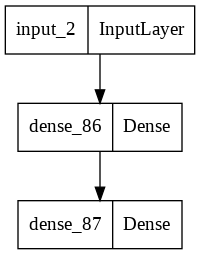

In [99]:
from keras.utils import plot_model

plot_model(model)

### 다중 입력, 다중 출력 모델
간단한 모델과 달리 딥러닝 모델은 리스트 같은 형태보다 그래프와 같은 형태를 닮았다. 예를 들어 다중 입력, 다중 출력이 이러한 형태인데, 이런 종류의 모델에서 함수형 API가 빛을 발할 수 있다.

예를 들어보자<br><br>
고객 이슈 티켓에 우선순위를 지정하고 적절한 부서로 전달하는 시스템을 만든다고 하면 이 모델은 3개의 입력을 사용하게 된다
- 이슈 티켓의 제목(텍스트 입력)
- 이슈 티켓의 텍스트 본문(텍스트 입력)
- 사용자가 추가한 태그(범주형 입력으로 여기에서는 원-핫 인코딩되었다고 가정)

텍스트 입력을 크기가 vocabulary_size인 0과 1로 이루어진 배열로 인코딩할 수 있다. 또한 이 모델은 출력도 2개이다

- 이슈 티켓의 우선순위 점수로 0과 1 사이의 스칼라(시그모이드 출력)
- 이슈 티켓을 처리해야 할 부서(전체 부서 집합에 대한 소프트 맥스 출력)

함수형 API를 사용하여 이런 모델을 몇 줄의 코드로 만들어 보자

In [100]:
import keras
from keras import Sequential
from keras.layers import Dense, Input, Concatenate

# 다중 입력, 다중 출력 함수형 모델
vocabulary_size = 10000
num_tags = 100

input_shape = (vocabulary_size,)

# 모델의 입력 정의
title = keras.Input(shape=input_shape, name='title')
text_body = keras.Input(shape=input_shape, name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')


# 입력 특성을 하나의 텐서 features로 연결
features = Concatenate()([title, text_body, tags])
# 중간층으로 입력 특성을 더 풍부하게 만들기
features = Dense(64, activation='relu')(features)


# 모델의 출력 정의
priority = Dense(1, activation='sigmoid', name='priority')(features)
department = Dense(4, activation='softmax', name='department')(features)


# 입력과 출력을 지정하여 모델 생성
model = keras.Model(inputs = [title, text_body, tags],
                    outputs = [priority, department])

In [101]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

레고와 같이 원하는 대로 여러 층으로 모델을 구성해봤다.
<br><br>
이제 Sequential 모델을 훈련하는 것과 거의 같은 방법으로 이 모델을 훈련 시키면 된다. 입력과 출력 데이토의 리스트로 fit() 메서드를 호출해야 하는데, 이때 데이터의 리스트는 Model 클래스에 전달한 순서와 같아야 한다.

In [102]:
import numpy as np

num_samples = 1280

# 더미(dummy) 입력 데이터
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))


# 더미 타깃 데이터
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, 4))


# compile
model.compile(optimizer='rmsprop',
              # 모델 클래스에 전달한 순서와 같이 적용할 함수 지정
              # 만약 순서에 신경쓰고 싶지 않거나 확실히 지정해주고 싶다면 딕셔너리 형으로 전달해줘도 된다
              # loss = {'priority' : ['mean_squared_error']
              #          'department' : ['categorical_crossentropy']}
              loss = ['mean_squared_error', 'categorical_crossentropy'],
              # metrics = {'priority' : ['mean_absolute_error'], 'department' : ['accuracy']}
              metrics = [['mean_absolute_error'], ['accuracy']])

In [103]:
# fit과 evaluate, predict 모두 딕셔너리형으로 전달할 수 있다
# 만약 fit을 딕셔너리 형으로 준다면 아래와 같다.
# model.fit({'title' : title_data, 'text_body': text_body_data, 'tags' : tags_data},
#            {'priority' : priority_data, 'department' : department_data},
#             epochs=1)
model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, deprtment_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 9ms/step - loss: 21.5157 - priority_loss: 0.3383 - department_loss: 21.1774 - priority_mean_absolute_error: 0.5045 - department_accuracy: 0.2570


40/40 [==============================] - 0s 9ms/step


함수형 모델은 명시적인 그래프 데이터 구조다. 층이 어떻게 연결되어있는지 조사하고 이전 그래프 노드(node; 층의 출력)를 새 모델의 일부로 재사용할 수 있다. 대부분의 연구자들이 심층 신경망에 대해 생각할 때 사용하는 '멘탈 모델(mental model)'인 층 그래프에도 잘 맞는데. 이를 통해 모델 시각화와 특성 추출이라는 두 가지 중요한 기능이 가능하다.

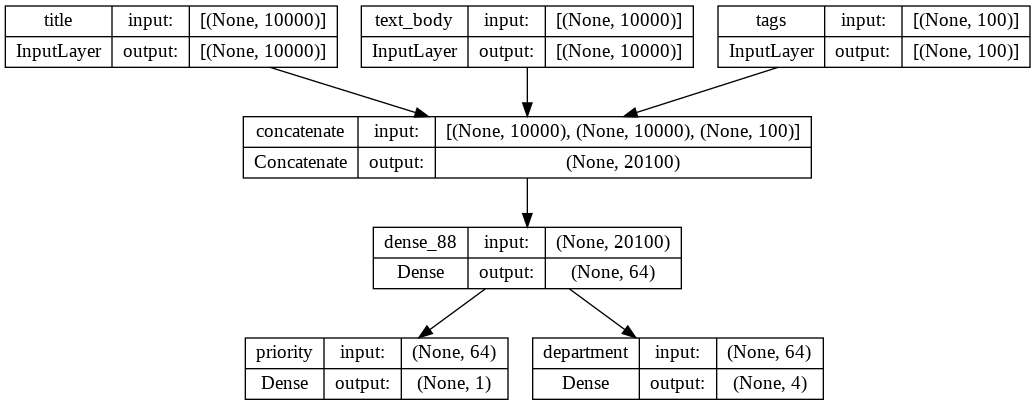

In [104]:
# 방금 위에서 정의한 모델의 연결구조(모델의 토폴로지(topology))를 시각화해보자
from keras.utils import plot_model

# 각 층의 입출력 크기를 그림에 함께 표시해보자
plot_model(model, 'ticket_classifier.png', show_shapes=True)

In [105]:
# model.layers 속성은 모델에 있는 모든 층의 리스트를 가지고 있다. 출력해보자
model.layers

In [106]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [107]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [108]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

이렇게 특성 추출(feature extraction)이 가능한데 이를 통해 다른 모델에서 중간 특성을 재사용하는 모델을 만들 수 있다. 예를 들어 이 모델에 또 다른 출력을 추가한다고 가정해보자. 이슈 티켓이 해결되는 데 걸리는 시간 즉, 일종의 난이도를 추정하려 하는데. 이를 위하여 quick, medium, difficult 3개 범주에 대한 분류 층을 추가하겠다. 이때 모델을 처음부터 다시 만들고 재훈련하는 것이 아니라 특성추출로 중간층을 참조할 수 있기 때문에 이전 모델의 중간 특성에서 시작할 수 있다.

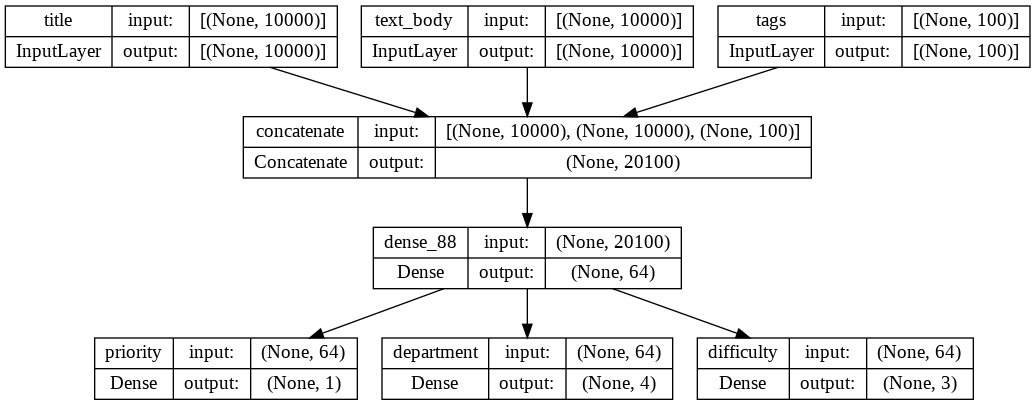

In [109]:
# 마지막 output층을 가져와서 담아주고
features = model.layers[4].output
# 거기에 연결해주었다.
difficulty = Dense(3, activation='softmax', name='difficulty')(features)
new_model = keras.Model(inputs=[title, text_body, tags],
                        outputs=[priority, department, difficulty])

plot_model(new_model, 'updated_ticket_classifier.png', show_shapes=True)

In [110]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        